In [1]:
!pip install numpy
!pip install matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

random.seed(int('0xC0FFEE', 16))
np.random.seed(int('0xC0FFEE', 16))
PI = math.pi

## Numpy data load




In [3]:
### np.savez('./filename.npz', x=X, y=Y)

practice1_data = np.load('./practice1_data.npz')
print(f'Check key values: {practice1_data.files}')
X, Y = practice1_data['x'], practice1_data['y']
print(X.shape, Y.shape)
print(X[0:10], Y[0:10])

Check key values: ['x', 'y']
(1000,) (1000,)
[160.86429835 174.97366162 173.9137621  163.800405   190.03698413
 166.23929116 186.3450603  177.38916332 166.12647418 169.35983898] [1. 0. 0. 1. 0. 1. 0. 0. 0. 1.]


# Practice 1
평균, 시그마가 정해진 두 개의 클래스에서 1차원 데이터를 샘플링해서, 히스토그램과 확률분포 함수를 각각 그려보시오.

In [4]:
def show_histogram(A, B):
    plt.hist(A, label='a', alpha=0.5)
    plt.hist(B, label='b', alpha=0.5)
    plt.legend(loc='upper left')
    plt.show()

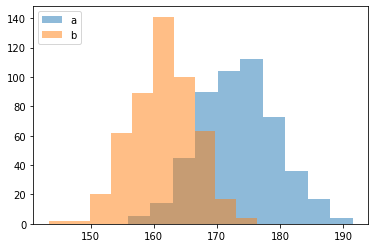

In [5]:
show_histogram(X[Y==0], X[Y==1])

In [6]:
def pdf(x, mean, std):
    return (1 / (std * np.sqrt(PI * 2))) * np.exp(-(1 / 2) * ((x - mean) / std) * ((x - mean) / std))

In [7]:
def show_pdf(x, Y_A, Y_B):
    plt.plot(x, Y_A, color='red', label='A')
    plt.plot(x, Y_B, color='blue', label='B')

    plt.legend(loc='upper left')
    plt.xlabel("$x$")
    plt.ylabel("$p(x)$")
    plt.show()

In [8]:
x = np.linspace(140, 200, 1000)
Y_A = pdf(x, np.mean(X[Y==0]), np.std(X[Y==0]))
Y_B = pdf(x, np.mean(X[Y==1]), np.std(X[Y==1]))

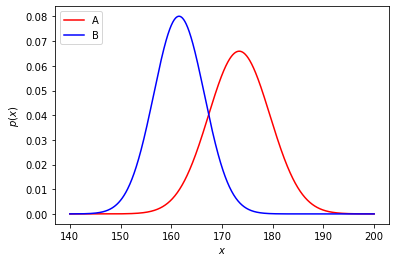

In [9]:
show_pdf(x, Y_A, Y_B)

# Practice 2

추가적으로 테스트 데이터를 샘플링해서, likelihood값만을 이용하는 경우, prior값과 결합하여 posterior로 볼 경우 각각에 대하여 분류 정확도를 보고하고 

(a) likelihood 함수를 그리고, 

(b) prior 적용 시, likelihood x prior 함수를 그리고,

(c) posterior =  likelihood x prior / p(x) 를 그리시오. 

prior의 변화에 따라 decision point를 그래프에서 대략적으로 읽고, prior에 따라서 분류 결과가 어떻게 변화하는지 설명하시오.

In [10]:
practice2_train = np.load('./practice2_train.npz')
print(f'Check key values: {practice2_train.files}')
X_train, Y_train = practice2_train['x'], practice2_train['y']
print(X_train.shape)

Check key values: ['x', 'y']
(1000,)


In [11]:
practice2_test = np.load('./practice2_test.npz')
print(f'Check key values: {practice2_test.files}')
X_test, Y_test = practice2_test['x'], practice2_test['y']
print(X_test.shape)

Check key values: ['x', 'y']
(100,)


In [12]:
def get_likelihood(x, A_mean, A_std, B_mean, B_std):
    return pdf(x, A_mean, A_std), pdf(x, B_mean, B_std)

In [13]:
def get_prior(A, B):
    prior_A = len(A)/ (len(A) + len(B))
    return (prior_A), (1 - prior_A)

In [14]:
def get_posterior(x, A_likelihood, B_likelihood, A_prior, B_prior):
    evidence = (A_likelihood * A_prior) + (B_likelihood * B_prior)
                 
    return A_likelihood * A_prior / evidence, B_likelihood * B_prior / evidence

In [15]:
def get_accuracy(Y_test, A_prob, B_prob):
    y_pred = np.where(A_prob > B_prob, 0, 1)

    return len(np.where(y_pred == Y_test)[0]) / len(y_pred)

Acc: 0.86


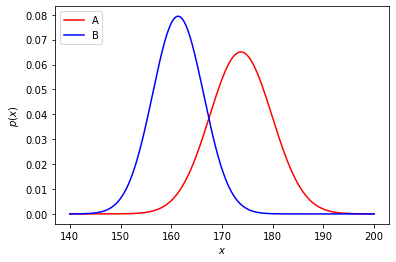

In [16]:
A_likelihood, B_likelihood = get_likelihood(X_test, 
                                np.mean(X_train[Y_train==0]),
                                np.std(X_train[Y_train==0]),
                                np.mean(X_train[Y_train==1]),
                                np.std(X_train[Y_train==1]))

y_pred = np.where(A_likelihood > B_likelihood, 0, 1)

print(f'Acc: {get_accuracy(Y_test, A_likelihood, B_likelihood)}')

graph_x = np.linspace(140, 200, 1000)
A_graph_x, B_graph_x = get_likelihood(graph_x, 
                                np.mean(X_train[Y_train==0]),
                                np.std(X_train[Y_train==0]),
                                np.mean(X_train[Y_train==1]),
                                np.std(X_train[Y_train==1]))
show_pdf(graph_x, A_graph_x, B_graph_x)

0.25 0.75
Acc: 0.83


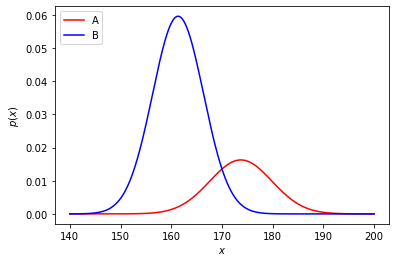

In [17]:
A_prior, B_prior = get_prior(X_train[Y_train==0], X_train[Y_train==1])

print(A_prior, B_prior)

print(f'Acc: {get_accuracy(Y_test, A_likelihood * A_prior, B_likelihood * B_prior)}')

show_pdf(graph_x, A_graph_x * A_prior, B_graph_x * B_prior)

Acc: 0.83


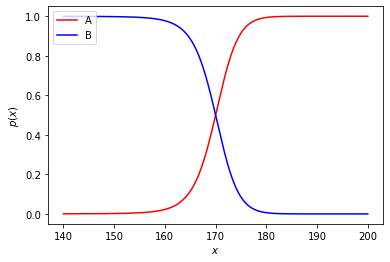

In [18]:
A_prob, B_prob = get_posterior(X_test, A_likelihood, B_likelihood, A_prior, B_prior)

print(f'Acc: {get_accuracy(Y_test, A_prob, B_prob)}')

A_graph_prob, B_graph_prob = get_posterior(X_test, A_graph_x, B_graph_x, A_prior, B_prior)


show_pdf(graph_x, A_graph_prob, B_graph_prob)

- prior_A: 0.5
- prior_B: 0.5

In [19]:
A_prob, B_prob = get_posterior(X_test, A_likelihood, B_likelihood, 0.5, 0.5)

print(f'Acc: {get_accuracy(Y_test, A_prob, B_prob)}')

Acc: 0.86


- prior_A: 0.4
- prior_B: 0.6

In [20]:
A_prob, B_prob = get_posterior(X_test, A_likelihood, B_likelihood, 0.4, 0.6)

print(f'Acc: {get_accuracy(Y_test, A_prob, B_prob)}')

Acc: 0.86


- prior_A: 0.25
- prior_B: 0.75

In [21]:
A_prob, B_prob = get_posterior(X_test, A_likelihood, B_likelihood, 0.25, 0.75)

print(f'Acc: {get_accuracy(Y_test, A_prob, B_prob)}')

Acc: 0.83


# Question 1

위에서 prior probability를 0.5:0.5에서 0.25:0.75로 변화시키면서 Bayesian 분류기의 분류 정확도를 평가하였다.
세가지 경우에서 점점 정확도가 떨어지는 이유에 대하여 설명하시오. 

답 : posterior에서는 prior probability가 영향을 미치게 되는데 여기서 분류정확도가 떨어진 이유는 변화되면서 test set의 실제 prior probability(prior probability=0.5:0.5)와 학습에 사용된 prior probability가 더 많이 달라졌기 때문이다. train set과 test set의 prior probability가 같아질 수록 정확도는 점점 높아지게 된다.

# Practice 3
두 클래스의 평균 사이의 거리를 점차 증가시키면서 train, test 데이터를 샘플링하여 Bayesian 분류기의 정확도를 계산해보시오.

s = 3
mu = (-1, 1), (-2, 2), (-3, 3)
train / test sampling - report performance

In [22]:
def get_data(num_data, ratio, A_mean, A_std, B_mean, B_std):

    num_data_A = int(num_data * ratio)
    num_data_B = num_data - num_data_A

    A = np.random.normal(loc=A_mean, scale=A_std, size=num_data_A)
    B = np.random.normal(loc=B_mean, scale=B_std, size=num_data_B)
    label_zeros = np.zeros((num_data_A, 1))
    label_ones = np.ones((num_data_B, 1))
    
    return A, B, label_zeros, label_ones

In [23]:
# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -1, 3, 1, 3)
# Test data
test_A, test_B, test_YA, test_YB = get_data(100, 0.5, -1, 3, 1, 3)
test_X = np.concatenate((test_A, test_B))
test_Y = np.concatenate((test_YA, test_YB)).reshape(-1)

Acc: 0.62


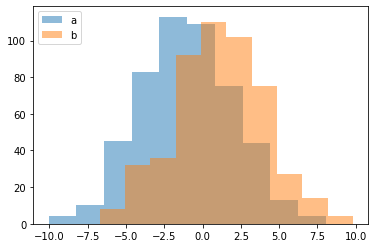

In [24]:
A_likelihood, B_likelihood = get_likelihood(test_X, 
                                np.mean(train_A),
                                np.std(train_A),
                                np.mean(train_B),
                                np.std(train_B))
A_prior, B_prior = get_prior(train_A, train_B)
A_prob, B_prob = get_posterior(test_X, A_likelihood, B_likelihood, A_prior, B_prior)
print(f'Acc: {get_accuracy(test_Y, A_prob, B_prob)}')
show_histogram(train_A, train_B)

In [25]:
# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -2, 3, 2, 3)
# Test data
test_A, test_B, test_YA, test_YB = get_data(100, 0.5, -2, 3, 2, 3)
test_X = np.concatenate((test_A, test_B))
test_Y = np.concatenate((test_YA, test_YB)).reshape(-1)

Acc: 0.72


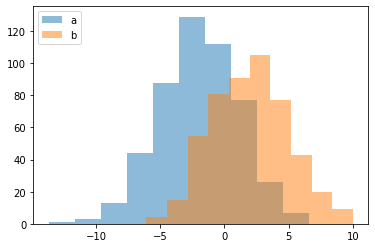

In [26]:
A_likelihood, B_likelihood = get_likelihood(test_X, 
                                np.mean(train_A),
                                np.std(train_A),
                                np.mean(train_B),
                                np.std(train_B))
A_prior, B_prior = get_prior(train_A, train_B)
A_prob, B_prob = get_posterior(test_X, A_likelihood, B_likelihood, A_prior, B_prior)
print(f'Acc: {get_accuracy(test_Y, A_prob, B_prob)}')
show_histogram(train_A, train_B)

In [27]:
# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -3, 3, 3, 3)
# Test data
test_A, test_B, test_YA, test_YB = get_data(100, 0.5, -3, 3, 3, 3)
test_X = np.concatenate((test_A, test_B))
test_Y = np.concatenate((test_YA, test_YB)).reshape(-1)

Acc: 0.87


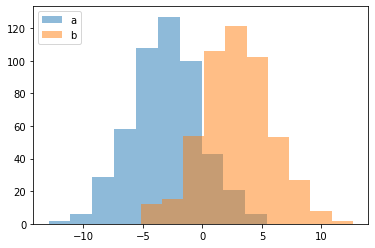

In [28]:
A_likelihood, B_likelihood = get_likelihood(test_X, 
                                np.mean(train_A),
                                np.std(train_A),
                                np.mean(train_B),
                                np.std(train_B))
A_prior, B_prior = get_prior(train_A, train_B)
A_prob, B_prob = get_posterior(test_X, A_likelihood, B_likelihood, A_prior, B_prior)
print(f'Acc: {get_accuracy(test_Y, A_prob, B_prob)}')
show_histogram(train_A, train_B)

# Practice 4

Practice 3에서 그린 세 개의 히스토그램을 probability density function으로 그리시오.



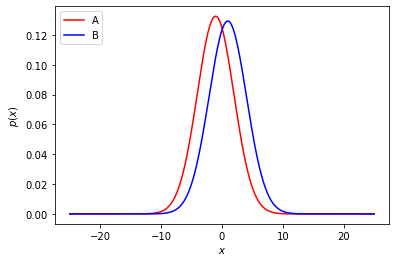

In [29]:

graph_x = np.linspace(-25, 25, 1000)#pdf을 그릴 때 x축의 범위를 -25~25사이로 제한하여 출력(대부분 이범위 안에서 나타나므로)

# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -1, 3, 1, 3)#practice 3의 1번 히스토그램과 같은 조건으로 데이터 생성

Y_A = pdf(graph_x, np.mean(train_A),np.std(train_A)) #train데이터 A의 평균과 s를 통해 A의 pdf 추출
Y_B = pdf(graph_x, np.mean(train_B),np.std(train_B)) #train데이터 B의 평균과 s를 통해 B의 pdf 추출
show_pdf(graph_x, Y_A, Y_B) #추출한 pdf를 그림.

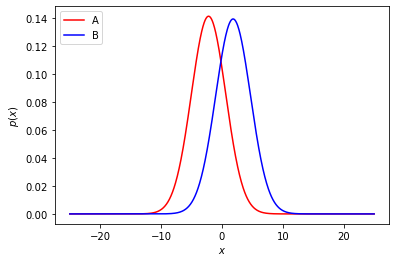

In [30]:
graph_x = np.linspace(-25, 25, 1000)#pdf을 그릴 때 x축의 범위를 -25~25사이로 제한하여 출력(대부분 이범위 안에서 나타나므로)

# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -2, 3, 2, 3)#practice 3의 2번 히스토그램과 같은 조건으로 데이터 생성

Y_A = pdf(graph_x, np.mean(train_A),np.std(train_A)) #train데이터 A의 평균과 s를 통해 A의 pdf 추출
Y_B = pdf(graph_x, np.mean(train_B),np.std(train_B)) #train데이터 B의 평균과 s를 통해 B의 pdf 추출
show_pdf(graph_x, Y_A, Y_B) #추출한 pdf를 그림.

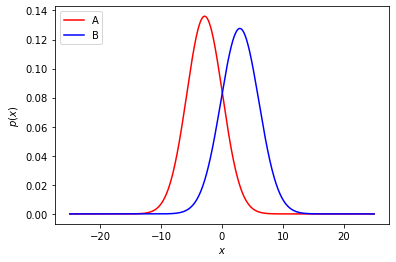

In [31]:
graph_x = np.linspace(-25, 25, 1000)#pdf을 그릴 때 x축의 범위를 -25~25사이로 제한하여 출력(대부분 이범위 안에서 나타나므로)

# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -3, 3, 3, 3)#practice 3의 3번 히스토그램과 같은 조건으로 데이터 생성

Y_A = pdf(graph_x, np.mean(train_A),np.std(train_A)) #train데이터 A의 평균과 s를 통해 A의 pdf 추출
Y_B = pdf(graph_x, np.mean(train_B),np.std(train_B)) #train데이터 B의 평균과 s를 통해 B의 pdf 추출
show_pdf(graph_x, Y_A, Y_B) #추출한 pdf를 그림.

# Practice 5

두 클래스의 데이터가 다음과 같은 Gaussian 분포를 따른다고 할 때, 아래 설명에 따라 Bayesian 분류기의 분류 정확도를 계산하시오. 

A class : mu = -1, s = 3
B class : mu = 3, s = 2

a) P(A)=P(B)일 때, p(x|A), p(x|B), P(A|x), P(B|x)를 그리시오.

b) P(A)=1/3, P(B)=2/3일 때, p(x|A), p(x|B), P(A|x), P(B|x)를 그리시오.

c) a)와 b)에서 구한 p(A|x)=p(B|x)을 풀면 decision point를 구할 수 있다. 각 decision point를 구하여 a)와 b)에서 그린 그래프 위에 표시하시오. 

d) Decision point를 구한 후에 Bayesian 분류기의 분류 방법이 어떻게 간단히 변화할 수 있는지 설명하시오.

e) test set을 A, B 클래스에 대하여 각 100개씩 샘플링하여, d)에서 설명한 방법으로 분류 정확도를 구하시오. 단, P(A)=P(B)



a)
p(x|A), p(x|B):


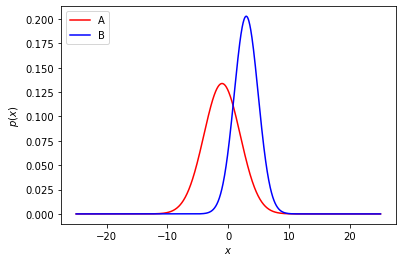

p(A|x), p(B|x):


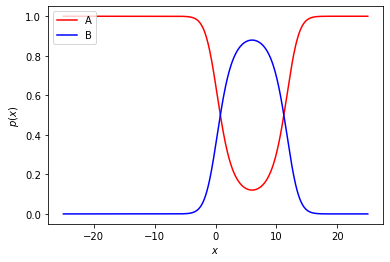

In [32]:
# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -1, 3, 3, 2)

print("a)")
graph_x = np.linspace(-25, 25, 1000)#x축의 범위를 -25~25사이로 제한



A_likelihood1, B_likelihood1 = get_likelihood(graph_x, np.mean(train_A),np.std(train_A),
                                            np.mean(train_B),np.std(train_B)) #A, B class의 평균, s값을 이용하여 likelihood값 뽑아냄 
A_prob1, B_prob1 = get_posterior(graph_x, A_likelihood1, B_likelihood1, 0.5, 0.5) #p(a)=p(b)이므로 각각 0.5씩해서 각각의 posterior 받아옴.


print("p(x|A), p(x|B):")
show_pdf(graph_x, A_likelihood1, B_likelihood1) #likelihood 그림.

print("p(A|x), p(B|x):")
show_pdf(graph_x, A_prob1, B_prob1) #posterior 그림.

b)
p(x|A), p(x|B):


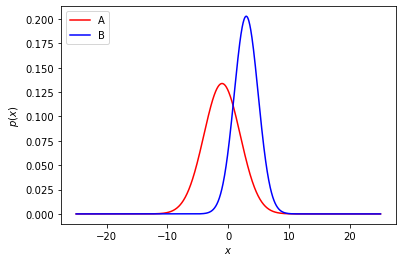

p(A|x), p(B|x):


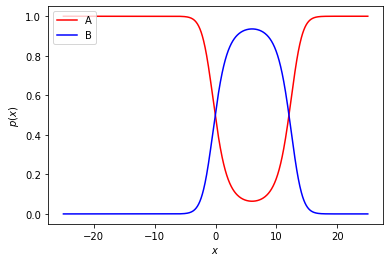

In [33]:
print("b)")
# Train data
graph_x = np.linspace(-25, 25, 1000)#x축의 범위를 -25~25사이로 제한

A_likelihood2, B_likelihood2 = get_likelihood(graph_x, np.mean(train_A),np.std(train_A),
                                            np.mean(train_B),np.std(train_B)) #A, B class의 평균, s값을 이용하여 likelihood값 뽑아냄 
A_prob2, B_prob2 = get_posterior(graph_x, A_likelihood2, B_likelihood2, 1.0/3, 2.0/3) #p(a)=1/3, p(b)=2/3이므로 각각 1/3, 2/3씩해서 각각의 posterior 받아옴.


print("p(x|A), p(x|B):")
show_pdf(graph_x, A_likelihood2, B_likelihood2) #likeli hood 그림.

print("p(A|x), p(B|x):")
show_pdf(graph_x, A_prob2, B_prob2) #posterior 그림.

c)
a)번의 decision point:


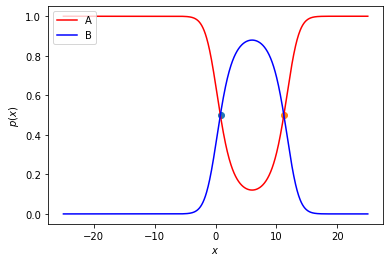

b)번의 decision point:


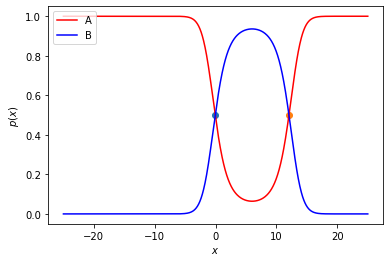

In [34]:
print("c)")


graph_x = np.linspace(-25, 25, 1000)#x축의 범위를 -25~25사이로 제한


decision_x_temp=[] #p(a)=p(b)인 경우의 decision point의 x좌표를 저장하는 list(e번 문제에서 사용하기 위해)

print("a)번의 decision point:")

for i in range(1, 1000):#graph_x는 1000개의 점으로 쪼갠것이므로 이를 순회(1부터 순회하는 이유는 i-1인덱스와의 비교를 위해서)
    if (A_prob1[i-1]-B_prob1[i-1])*(A_prob1[i]-B_prob1[i]) < 0 : #만약 i-1번쨰 A,B posterior값의 뺄셈값과 i번쨰 뺄셈값을 곱해서 음수가 나오면 그 부분에서 교차되었다는 뜻이므로 decision point임
        plt.scatter((graph_x[i-1]+graph_x[i+1])/2,(A_prob1[i-1]+B_prob1[i-1]+A_prob1[i]+B_prob1[i])/4)#해당 부분에 점 찍어줌(정확한 값이아니므로 평균을 내서 찍어줌)
        decision_x_temp.append((graph_x[i-1]+graph_x[i+1])/2) #decision point의 x값을 리스트에넣어줌.(e번 문제에서 사용하기 위해)
show_pdf(graph_x, A_prob1, B_prob1) #posterior 그림.

decision_x=np.array(decision_x_temp) #decision point list를 numpy array형태로 바꾸어줌(e번 문제에서 사용하기 위해서)


print("b)번의 decision point:")

for i in range(1, 1000):#graph_x는 1000개의 점으로 쪼갠것이므로 이를 순회(1부터 순회하는 이유는 i-1인덱스와의 비교를 위해서)
    if (A_prob2[i-1]-B_prob2[i-1])*(A_prob2[i]-B_prob2[i]) < 0 : #만약 i-1번쨰 A,B posterior값의 뺄셈값과 i번쨰 뺄셈값을 곱해서 음수가 나오면 그 부분에서 교차되었다는 뜻이므로 decision point임
        plt.scatter((graph_x[i-1]+graph_x[i+1])/2,(A_prob2[i-1]+B_prob2[i-1]+A_prob2[i]+B_prob2[i])/4)#해당 부분에 점 찍어줌(정확한 값이아니므로 평균을 내서 찍어줌)  
show_pdf(graph_x, A_prob2, B_prob2) #posterior 그림.

d) 
Decision point를 이용하여 이제 분류를 할 수 있게 된다. Decision point의 X값과 test data의 x값을 비교하여, X보다 작다, 두 decision point 사이에 있다, X보다 크다를 이용하여 쉽게 분류할 수 있게 된다. 위에서는 test data x값이 첫 decision point의 X보다 작은 경우에는 class A가 되게 된다. 그리고 첫 decision point X값과 두 번째 decision point의 X값 사이에 있는 경우 B class가 되게 되고, 두 번째 decision point X보다 큰 경우에는 class A가 되게된다.

In [48]:
# Test data를 추출
test_A, test_B, test_YA, test_YB = get_data(200, 0.5, -1, 3, 3, 2)
test_X = np.concatenate((test_A, test_B))
test_Y = np.concatenate((test_YA, test_YB)).reshape(-1)


y_pred = np.zeros(len(test_X)) #test X에 대한 각 결과값(prediction값)을 저장할 배열

#위의 d번문제에서 설명한대로  test data x값이 첫 decision point의 X보다 작은 경우와 
#두번째 decision point X보다 큰경우에는 class A가 되게 된다.
#그리고 그외에는 class B가 되게 된다.
for i in range(0, len(test_X)) : #200개의 test 데이터를 순회
    if(test_X[i] <= decision_x[0] or test_X[i] > decision_x[1]):
        y_pred[i]=0#classa
    else:
        y_pred[i]=1#classb

print(f'Acc: {len(np.where(y_pred == test_Y)[0]) / len(y_pred)}') #정확도 계산


Acc: 0.805
